# Basics #
## 4. Market quotes ##

In [1]:
import matplotlib.pyplot as plot
import numpy

In [2]:
import QuantLib as ql

In [3]:
today = ql.Date(17, ql.October, 2016)
ql.Settings.instance().evaluationDate = today

### Setting the stage ###

In [4]:
data = [ (2, 0.02), (4, 0.0225), (6, 0.025), (8, 0.0275),
        (10, 0.03), (12, 0.0325), (14, 0.035), (16, 0.0375),
        (18, 0.04), (20, 0.0425), (22, 0.045), (24, 0.0475),
        (26, 0.05), (28, 0.0525), (30, 0.055)]

In [5]:
calendar = ql.TARGET()
settlement = calendar.advance(today, 3, ql.Days)
quotes = []
helpers = []
for length, coupon in data:
    maturity = calendar.advance(settlement, length, ql.Years)
    schedule = ql.Schedule(settlement, maturity, ql.Period(ql.Annual),
                           calendar, ql.ModifiedFollowing, ql.ModifiedFollowing,
                           ql.DateGeneration.Backward, False)
    quote = ql.SimpleQuote(100.0)
    quotes.append(quote)
    helpers.append(ql.FixedRateBondHelper(ql.QuoteHandle(quote), 3, 100,
                                          schedule, [coupon], ql.SimpleDayCounter(),
                                          ql.ModifiedFollowing))
curve = ql.FittedBondDiscountCurve(0, calendar, helpers,
                                   ql.SimpleDayCounter(), ql.NelsonSiegelFitting())

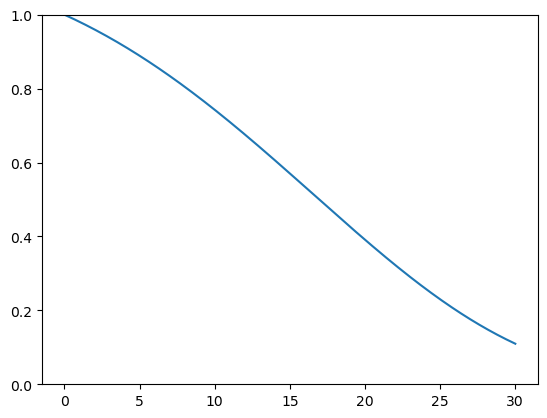

In [6]:
sample_times = numpy.linspace(0.0, 30.0, 301)
sample_discounts = [curve.discount(t) for t in sample_times]
f, ax = plot.subplots()
ax.set_ylim(0.0, 1.0)
_ = ax.plot(sample_times, sample_discounts)

In [7]:
schedule = ql.Schedule(today, calendar.advance(today, 15, ql.Years),
                       ql.Period(ql.Semiannual), calendar,
                       ql.ModifiedFollowing, ql.ModifiedFollowing,
                       ql.DateGeneration.Backward, False)
bond = ql.FixedRateBond(3, 100.0, schedule, [0.04], ql.Actual360())
bond.setPricingEngine(ql.DiscountingBondEngine(ql.YieldTermStructureHandle(curve)))
print(bond.cleanPrice())

105.77449622178025


### “It looked like a good idea at the time” ###

In [8]:
prices = []
def print_price():
    p = bond.cleanPrice()
    prices.append(p)
    print(p)
o = ql.Observer(print_price)
o.registerWith(bond)

In [9]:
quotes[2].setValue(101.0)

105.77449622178025
105.86560413454633


In [10]:
quotes[2].setValue(100.0)

105.86560413454633
105.77449629935997


In [11]:
prices = []
for q in quotes:
    q.setValue(101.0)

105.77449629935997
105.28388431734797
105.28388431734797
105.21862908937854
105.21862908937854
105.31959061782912
105.31959061782912
105.4878665199256
105.4878665199256
105.68032069984417
105.68032069984417
105.87580395370706
105.87580395370706
106.06201712895626
106.06201712895626
106.23044640303691
106.23044640303691
106.37409225296702
106.37409225296702
106.48708840964723
106.48708840964723
106.56505206560037
106.56505206560037
106.60570725304025
106.60570725304025
106.60980189619876
106.60980189619876
106.58011141886773
106.58011141886773
106.52070693410052


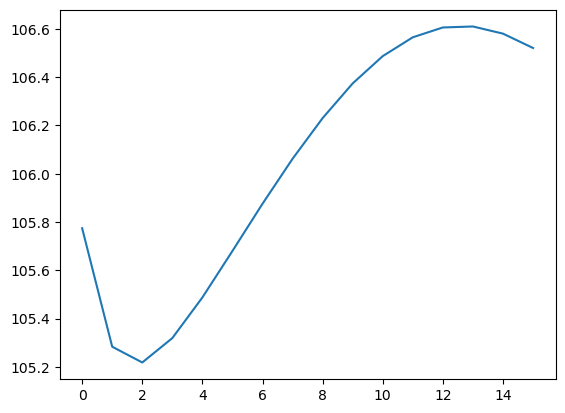

In [12]:
unique_prices = prices[::2] + prices[-1::]
_ = plot.plot(unique_prices, '-')

In [13]:
bond.freeze()

In [14]:
for q in quotes:
    q.setValue(101.5)

In [15]:
bond.unfreeze()

106.8583936144757


### Pull, don’t push ###

In [16]:
del o

In [17]:
flag = {}
flag['status'] = 'down'
def set_flag():
    flag['status'] = 'up'
o = ql.Observer(set_flag)
o.registerWith(bond)

In [18]:
print(flag)

{'status': 'down'}


In [19]:
for q in quotes:
    q.setValue(100.0)

In [20]:
print(flag)

{'status': 'up'}


In [21]:
bond.cleanPrice()

105.77449621996125

In [22]:
del o

In [23]:
for q in quotes:
    q.setValue(101.0)

In [24]:
bond.cleanPrice()

106.5207070764094